# import libraries


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import KFold, cross_val_score,cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from yellowbrick.classifier import confusion_matrix as yell_con
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,MaxAbsScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')
import plotly_express as px

## load data

In [2]:
df=pd.read_csv('C:/Users/Ebrahim/Desktop/workshop/data scientist project/final project/PowerCo_project-20240416T151617Z-001/PowerCo_project/data/raw/client_clean_plus.csv')

In [3]:
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,...,day_renewal,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_years,price_month,modification_count
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,...,192,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2015,1,12
1,1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,...,192,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2015,2,12
2,2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,3,12
3,3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,4,12
4,4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,5,12


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## first we will check the best model for out data

In [115]:
def ohe_encoder(data):
    df=data.copy()
    ohe_cols=[col for col in df if df[col].dtype in ['object','category']]
    ohe=OneHotEncoder(drop='first',sparse_output=False)
    ohe_encoder=ohe.fit_transform(df[ohe_cols])
    df_ohe_encoded=pd.DataFrame(ohe_encoder,columns=ohe.get_feature_names_out())
    df_encoded=pd.concat([df_ohe_encoded,df],axis=1)
    df_encoded.drop(ohe_cols,axis=1,inplace=True)
    return df_encoded
df_encoded=ohe_encoder(df)
df_encoded.head()

,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,descount_level_11-20,descount_level_21-30,descount_level_6-10,...,day_renewal,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_years,price_month,modification_count
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2015,1,12
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,2015,2,12
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,3,12
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,4,12
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,192,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,2015,5,12


In [ ]:
#scaler the data
def normalize_data(data):
  df=data.copy()
  scaler=StandardScaler()
  for col in df:
    if col != 'churn':
      df[col]=scaler.fit_transform(df[[col]])
  return df
scaled_df=normalize_data(df_encoded)
scaled_df.head()

,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,has_gas_t,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,descount_level_11-20,descount_level_21-30,descount_level_6-10,...,day_renewal,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_years,price_month,modification_count
0,-0.255089,1.077522,-0.380457,-0.322578,2.124747,-0.524958,1.02355,-0.016604,-0.189253,-0.008301,...,0.240876,-0.700037,1.021273,1.199867,-0.509943,1.22698,1.294906,0.0,-1.593513,0.061955
1,-0.255089,1.077522,-0.380457,-0.322578,2.124747,-0.524958,1.02355,-0.016604,-0.189253,-0.008301,...,0.240876,-0.700037,1.021273,1.199867,-0.509943,1.22698,1.294906,0.0,-1.303829,0.061955
2,-0.255089,1.077522,-0.380457,-0.322578,2.124747,-0.524958,1.02355,-0.016604,-0.189253,-0.008301,...,0.240876,-0.700037,1.021273,1.199867,-0.509943,1.22698,1.294906,0.0,-1.014144,0.061955
3,-0.255089,1.077522,-0.380457,-0.322578,2.124747,-0.524958,1.02355,-0.016604,-0.189253,-0.008301,...,0.240876,-0.700037,1.021273,1.199867,-0.509943,1.22698,1.294906,0.0,-0.724460,0.061955
4,-0.255089,1.077522,-0.380457,-0.322578,2.124747,-0.524958,1.02355,-0.016604,-0.189253,-0.008301,...,0.240876,-0.700037,1.021273,1.199867,-0.509943,1.22698,1.294906,0.0,-0.434775,0.061955


In [ ]:
x_scaled=scaled_df.drop('churn',axis=1)
y_scaled=scaled_df['churn']
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_scaled,y_scaled,test_size=0.2)

In [ ]:
class_dict={
    'AdaBoostClassifier':AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'LogisticRegression':LogisticRegression(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'XGBClassifier':XGBClassifier()
}
classifiers_scoer=[]
for name,model in class_dict.items():
    kfold=KFold(n_splits=10,random_state=44,shuffle=True)
    cv_score=cross_val_score(model,x_scaled,y_scaled,cv=kfold,scoring='roc_auc',error_score='raise')
    classifiers_scoer.append(cv_score.mean())
classifiers_df=pd.DataFrame({'classifier':class_dict.keys(),'score':classifiers_scoer})
classifiers_df.sort_values(by='score')

,classifier,score
7,GaussianNB,0.613868
5,LogisticRegression,0.663767
0,AdaBoostClassifier,0.713070
4,GradientBoostingClassifier,0.768644
6,KNeighborsClassifier,0.984303
8,XGBClassifier,0.996335
3,DecisionTreeClassifier,0.999744
1,BaggingClassifier,1.000000
2,RandomForestClassifier,1.000000


In [5]:
cat_cols=[col for col in df if df[col].dtype in ['object','category']]

num_cols = df.select_dtypes(exclude=['object','category']).columns.drop('churn').tolist()
x=df.drop('churn',axis=1)
y=df['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [6]:
pip_step=[]
pip_step.append(('impute',SimpleImputer()))
pip_step.append(('scaler',MinMaxScaler()))
numerical_transform=Pipeline(steps=pip_step)
numerical_transform

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', MinMaxScaler())])

In [7]:
pip_step=[]
pip_step.append(('impute',SimpleImputer(strategy='most_frequent')))
pip_step.append(('ohe_encoder',OneHotEncoder(sparse_output=False,drop='first')))
category_transform=Pipeline(steps=pip_step)
category_transform

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe_encoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [8]:
preproc_pip=ColumnTransformer(transformers=[
    ('number',numerical_transform,num_cols),
    ('category',category_transform,cat_cols)
],remainder='passthrough')
preproc_pip

ColumnTransformer(remainder='passthrough',
                  transformers=[('number',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['cons_12m', 'cons_gas_12m', 'cons_last_month',
                                  'forecast_cons_12m', 'forecast_cons_year',
                                  'forecast_discount_energy',
                                  'forecast_meter_rent_12m',
                                  'forecast_price_energy_off_peak',
                                  'forecast_price_energy_peak',
                                  'forecast_pr...
                                  'day_to_end', 'day_modif_prod', 'day_renewal',
                                  'price_off_peak_var', 'price_peak_var',
                                  'price_mid_peak_var', 'price_off_peak_fix',
                                  'price_peak_fix', 'price_mid_peak_fix',
                                  'price_month', ...]),
                                ('category',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['channel_sales', 'has_gas', 'origin_up',
                                  'descount_level'])])

In [9]:
# select the Kbest
R_model=RandomForestClassifier()
k_best=SelectKBest(chi2,k='all')
pip_step=[]
pip_step.append(('k_best',k_best))
pip_step.append(('R_model',R_model))
train_pip=Pipeline(steps=pip_step)
train_pip

Pipeline(steps=[('k_best',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x000001E2E14A5580>)),
                ('R_model', RandomForestClassifier())])

In [10]:
#combining the preprocessing and training piplines
complte_pipline=Pipeline(steps=[
    ('preprocessing',preproc_pip),
    ('training_model',train_pip)
])
complte_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cons_12m', 'cons_gas_12m',
                                                   'cons_last_month',
                                                   'forecast_cons_12m',
                                                   'forecast_cons_year',
                                                   'forecast_discount_energy',
                                                   'forecast_meter_rent_12m',
                                                   'forecast_price_energy_off_peak',
                                                   'forecas...
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['channel_sales', 'has_gas',
                                                   'origin_up',
                                                   'descount_level'])])),
                ('training_model',
                 Pipeline(steps=[('k_best',
                                  SelectKBest(k='all',
                                              score_func=<function chi2 at 0x000001E2E14A5580>)),
                                 ('R_model', RandomForestClassifier())]))])

In [11]:
complte_pipline.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cons_12m', 'cons_gas_12m',
                                                   'cons_last_month',
                                                   'forecast_cons_12m',
                                                   'forecast_cons_year',
                                                   'forecast_discount_energy',
                                                   'forecast_meter_rent_12m',
                                                   'forecast_price_energy_off_peak',
                                                   'forecas...
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['channel_sales', 'has_gas',
                                                   'origin_up',
                                                   'descount_level'])])),
                ('training_model',
                 Pipeline(steps=[('k_best',
                                  SelectKBest(k='all',
                                              score_func=<function chi2 at 0x000001E2E14A5580>)),
                                 ('R_model', RandomForestClassifier())]))])

In [12]:
#chck the accurcy of model
def model_report(model,x_train,x_test,y_train,y_test):
  """ function to plot the model report ...."""

  # make a predict of x_test
  y_pred=model.predict(x_test)

  # make a classification_report of y test ,y pred
  report=classification_report(y_test,y_pred)

  # accuracy of model
  accuracy=accuracy_score(y_test,y_pred)
  # print reort and accuracy
  print(f"Classification Report:\n{report}\n")
  print(f"Accuracy Score: {accuracy}\n")

  # plot confusion matrix
  print('confusion matrix :\n')
  con=yell_con(model,x_train,y_train,x_test,y_test,classes=['not churn','churn'])
  con.show()
  # plot rocauc of model
  print('Rocauc plot for model : \n')
  Roc_model=ROCAUC(model,binary=True,classes=['Not churn','churn'])
  Roc_model.fit(x_train,y_train)
  Roc_model.score(x_test,y_test,)
  Roc_model.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31482
           1       1.00      1.00      1.00      3349

    accuracy                           1.00     34831
   macro avg       1.00      1.00      1.00     34831
weighted avg       1.00      1.00      1.00     34831


Accuracy Score: 1.0

confusion matrix :



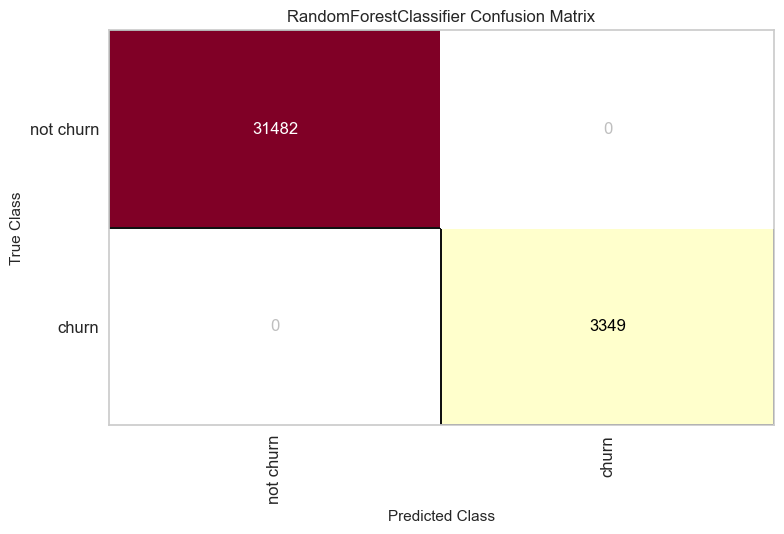

Rocauc plot for model : 



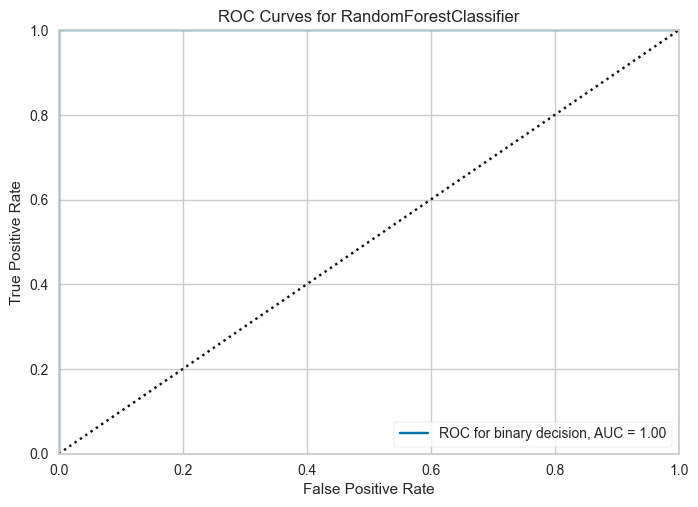

In [13]:
model_report(complte_pipline,x_train,x_test,y_train,y_test)

In [14]:
complte_pipline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cons_12m', 'cons_gas_12m',
                                                   'cons_last_month',
                                                   'forecast_cons_12m',
                                                   'forecast_cons_year',
                                                   'forecast_discount_energy',
                                                   'forecast_meter_rent_12m',
                                                   'forecast_price_energy_off_peak',
                                                   'forecas...
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['channel_sales', 'has_gas',
                                                   'origin_up',
                                                   'descount_level'])])),
                ('training_model',
                 Pipeline(steps=[('k_best',
                                  SelectKBest(k='all',
                                              score_func=<function chi2 at 0x000001E2E14A5580>)),
                                 ('R_model', RandomForestClassifier())]))])

In [15]:
feature_names = complte_pipline.named_steps['preprocessing']
feature_encoded=feature_names.get_feature_names_out()
encoded_features = pd.Series(feature_encoded)
encoded_features = encoded_features.str.replace('ohe__', '')
encoded_features = encoded_features.str.replace('remainder__', '')
encoded_features = encoded_features.str.replace('number__', '')
encoded_features = encoded_features.str.replace('category__', '')
importance = complte_pipline.named_steps['training_model'].named_steps['R_model'].feature_importances_

feature_importances=pd.DataFrame({
    'Features':encoded_features,
    'Importances':np.round( importance*100,2)
  })
feature_importances=feature_importances.sort_values(by='Importances')


#visualization the feature imortance
fig=px.bar(feature_importances,x='Importances',y='Features',text='Importances',
       title='The Importance of eatch Features',
       color_discrete_sequence=['orange'])

fig.update_traces(texttemplate='%{text:.1f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.show()

In [ ]:
pip install skops

In [18]:
import skops.io as sio
sio.dump(complte_pipline,'C:/Users/Ebrahim/Desktop/workshop/data scientist project/final project/PowerCo_project-20240416T151617Z-001/PowerCo_project/models/PowerCo_model.skops')

In [19]:
new_predict=sio.load('C:/Users/Ebrahim/Desktop/workshop/data scientist project/final project/PowerCo_project-20240416T151617Z-001/PowerCo_project/models/PowerCo_model.skops',trusted=True)

In [20]:
new_predict

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['cons_12m', 'cons_gas_12m',
                                                   'cons_last_month',
                                                   'forecast_cons_12m',
                                                   'forecast_cons_year',
                                                   'forecast_discount_energy',
                                                   'forecast_meter_rent_12m',
                                                   'forecast_price_energy_off_peak',
                                                   'forecas...
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe_encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['channel_sales', 'has_gas',
                                                   'origin_up',
                                                   'descount_level'])])),
                ('training_model',
                 Pipeline(steps=[('k_best',
                                  SelectKBest(k='all',
                                              score_func=<function chi2 at 0x0000013ECF3C3BA0>)),
                                 ('R_model', RandomForestClassifier())]))])

In [135]:
df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'descount_level', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'day_activ', 'day_to_end',
       'day_modif_prod', 'day_renewal', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'price_month', 'modification_count'],
      dtype='object')

In [136]:
df[:1]

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,day_modif_prod,day_renewal,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,price_month,modification_count
0,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,...,61,192,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1,12


In [24]:
df['descount_level'].unique()

array(['0-5', '21-30', '6-10', '11-20'], dtype=object)

In [78]:
df['num_years_antig'].max()

4752.8

In [38]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    80588
MISSING                             44492
lmkebamcaaclubfxadlmueccxoimlema    22021
usilxuppasemubllopkaafesmlibmsdf    16414
ewpakwlliwisiwduibdlfmalxowmwpci    10640
Name: count, dtype: int64

In [21]:
new_predict.predict(df[:1].drop('churn',axis=1))

array([1], dtype=int64)